### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a background to the graphs
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [163]:
# The 3 datasets from User rating data (Data.csv)
Data = pd.read_csv("Data.csv")
Data.head(3)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [164]:
# The 3 datasets from movie data (item.csv)
Item = pd.read_csv("item.csv")
Item.head(3)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [165]:
# The 3 datasets from User data (user.csv)
User = pd.read_csv("user.csv")
User.head(3)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [166]:
#User rating Data-  info, shape, describe and the missues values 
#The info of DAta
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [167]:
#Shape of the Data
Data.shape

(100000, 4)

In [168]:
#Statistical measurements of the Data
Data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [169]:
#number of missing values in Data
pd.DataFrame(Data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


In [170]:
#Movie data-  info, shape, describe and the missues values
#Info of Movie data(Item)
Item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [171]:
#shape of the item data
Item.shape

(1681, 22)

In [172]:
#Statistical measurements of the item data
Item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
#Number of missing values in the item data
pd.DataFrame(Item.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [174]:
#User data-  info, shape, describe and the missues values
#info of the User data
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [175]:
#Shape of User data
User.shape

(943, 5)

In [176]:
#Statistical measurements of User data
User.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [177]:
#Number of missing values in User data
pd.DataFrame(User.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [178]:
#Number of movies per genre using item data
number_movies = pd.DataFrame(data = Item, columns = ["unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
number_movies.count()

unknown        1681
Action         1681
Adventure      1681
Animation      1681
Childrens      1681
Comedy         1681
Crime          1681
Documentary    1681
Drama          1681
Fantasy        1681
Film-Noir      1681
Horror         1681
Musical        1681
Mystery        1681
Romance        1681
Sci-Fi         1681
Thriller       1681
War            1681
Western        1681
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [179]:
#Making copy of the Item data as before  dropping the genre "unknown" from original dataset so that the original data sets remains unaffected.
#dropping the movie where the genre is unkown
df1 = Item.copy()
df1
df1.drop(["unknown"], axis = 1, inplace = True)

In [180]:
#showing info of new dataframe df1 after dropping "unkown" column for a movie from Item dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   Action        1681 non-null   int64 
 4   Adventure     1681 non-null   int64 
 5   Animation     1681 non-null   int64 
 6   Childrens     1681 non-null   int64 
 7   Comedy        1681 non-null   int64 
 8   Crime         1681 non-null   int64 
 9   Documentary   1681 non-null   int64 
 10  Drama         1681 non-null   int64 
 11  Fantasy       1681 non-null   int64 
 12  Film-Noir     1681 non-null   int64 
 13  Horror        1681 non-null   int64 
 14  Musical       1681 non-null   int64 
 15  Mystery       1681 non-null   int64 
 16  Romance       1681 non-null   int64 
 17  Sci-Fi        1681 non-null   int64 
 18  Thriller      1681 non-null   int64 
 19  War   

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [198]:
# adding "genres" column in the dataset df1 which is the sum of all the genres for a movie
df1['genres'] = df1.iloc[:, -20:-2].sum(axis=1)
df1

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres,release_year
0,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,1995-01-01,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,1995-01-01,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,1995-01-01,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,3,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1998
1677,1679,B. Monkey,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,2,1998
1678,1680,Sliding Doors,1998-01-01,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,1998
1679,1681,You So Crazy,1994-01-01,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1994


In [199]:
#Displaying the movie name and the number of genres that belong
df3 = df1[["movie title", "genres"]]
df3

,movie title,genres
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [200]:
#Total number of movies more than one genre
print("total number of movies which have more than one genres")
df4 = (df1.genres > 1).sum()
df4

total number of movies which have more than one genres


849

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [201]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


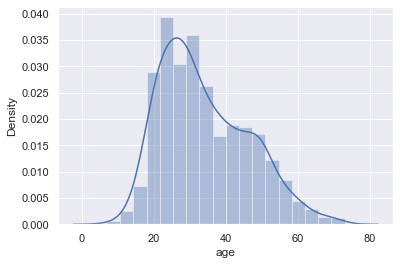

In [202]:
#using distplot for Age
sns.distplot(User["age"]);

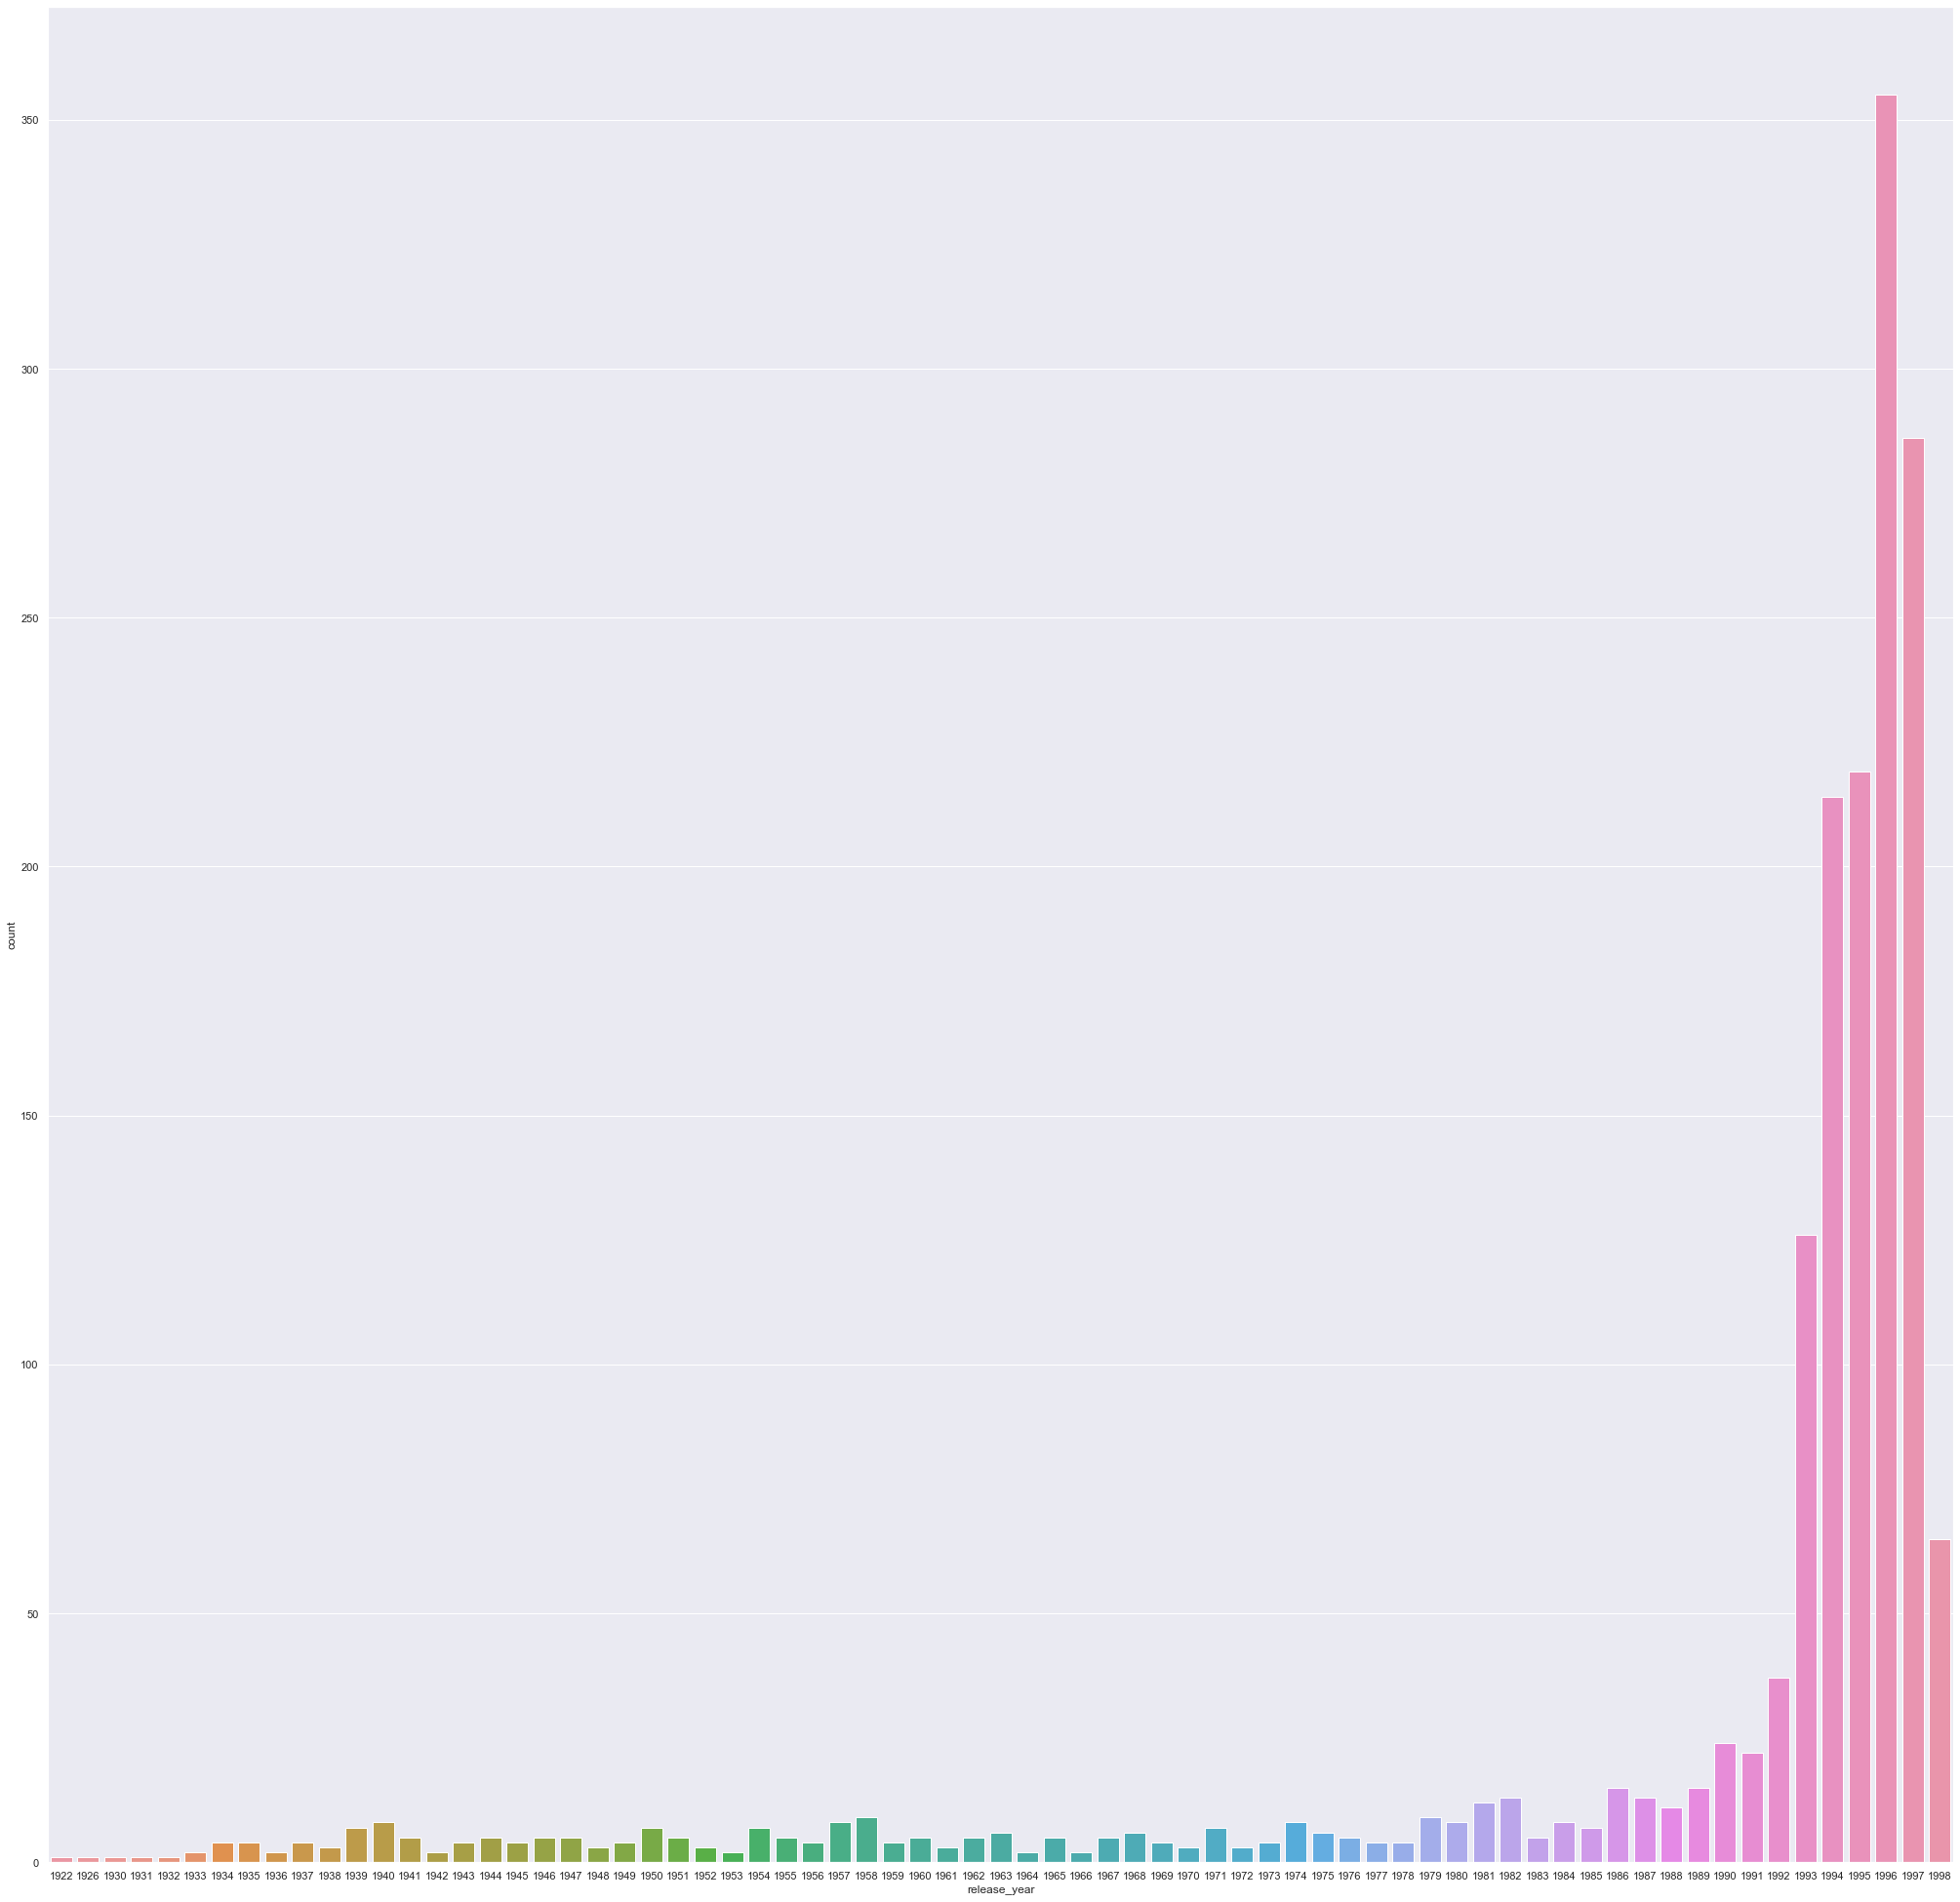

In [203]:
#using countplot to the release year after converting release date to release year
#made the separate column "release_year" in the dataset then plotted as countplot
df1['release date'] = pd.to_datetime(df1['release date'])
df1['release_year'] = df1['release date'].dt.year
plt.figure(figsize = (35, 35))
sns.countplot(x = "release_year", data = df1);
plt.show()


In [204]:
#calculating rating column from dataset Data into percentage value
df_rating = Data["rating"].value_counts(normalize = True) * 100
df_rating

4    34.174
3    27.145
5    21.201
2    11.370
1     6.110
Name: rating, dtype: float64

Text(0, 0.5, 'Percentage')

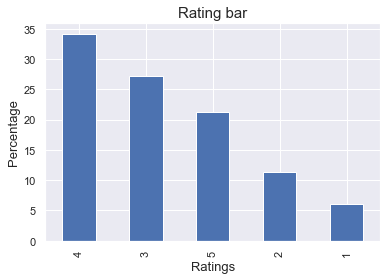

In [205]:
# Now plotting the df_rating against percentages shown in y axis and ratings in x -axis
df_rating.plot(kind = "bar");
plt.title("Rating bar", fontsize =15)
plt.xlabel("Ratings", fontsize =13)
plt.ylabel("Percentage", fontsize =13)

In [206]:
#calculating gender column from dataframe User into percentage value of male(M) and female(F)
df_gender = User["gender"].value_counts(normalize = True) * 100
df_gender

M    71.049841
F    28.950159
Name: gender, dtype: float64

Text(0, 0.5, 'Percentage')

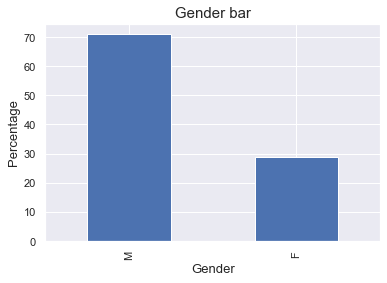

In [207]:
# Now plotting the df_gender against percentage shown in y axis and gender in x -axis
df_gender.plot(kind = "bar");
plt.title("Gender bar", fontsize =15)
plt.xlabel("Gender", fontsize =13)
plt.ylabel("Percentage", fontsize =13)

In [208]:
#calculating occupation column from dataframe User into percentage value
df_occupation = User["occupation"].value_counts(normalize = True) * 100
df_occupation

student          20.784730
other            11.134677
educator         10.074231
administrator     8.377519
engineer          7.104984
programmer        6.998940
librarian         5.408271
writer            4.772004
executive         3.393425
scientist         3.287381
artist            2.969247
technician        2.863203
marketing         2.757158
entertainment     1.908802
healthcare        1.696713
retired           1.484624
lawyer            1.272534
salesman          1.272534
none              0.954401
homemaker         0.742312
doctor            0.742312
Name: occupation, dtype: float64

Text(0, 0.5, 'Percentage')

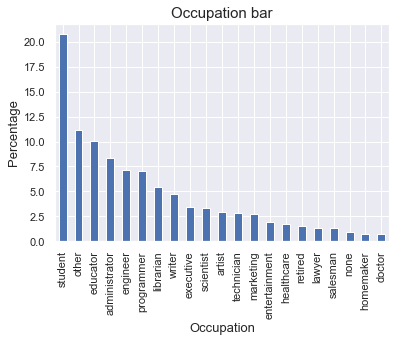

In [209]:
# Now plotting the df_occupation against percentage shown in y axis and occupation in x -axis
df_occupation.plot(kind = "bar");
plt.title("Occupation bar", fontsize =15)
plt.xlabel("Occupation", fontsize =13)
plt.ylabel("Percentage", fontsize =13)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [210]:
#copy the dataset from df1 toretail the original df1 dataset
df_df1 = df1.copy()
df_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie id      1681 non-null   int64         
 1   movie title   1681 non-null   object        
 2   release date  1681 non-null   datetime64[ns]
 3   Action        1681 non-null   int64         
 4   Adventure     1681 non-null   int64         
 5   Animation     1681 non-null   int64         
 6   Childrens     1681 non-null   int64         
 7   Comedy        1681 non-null   int64         
 8   Crime         1681 non-null   int64         
 9   Documentary   1681 non-null   int64         
 10  Drama         1681 non-null   int64         
 11  Fantasy       1681 non-null   int64         
 12  Film-Noir     1681 non-null   int64         
 13  Horror        1681 non-null   int64         
 14  Musical       1681 non-null   int64         
 15  Mystery       1681 non-null   int64   

In [211]:
#Dropping the unnecessary cilumns besides release_year, genres and movie title
df_df1.drop(df_df1.iloc[:, 2:21], inplace = True, axis =1)
df_df1.head()

,movie id,movie title,genres,release_year
0,1,Toy Story,3,1995
1,2,GoldenEye,3,1995
2,3,Four Rooms,1,1995
3,4,Get Shorty,3,1995
4,5,Copycat,3,1995


In [212]:
#Adding column "total" which defines total number of movies per year
df_df1["total"] = df_df1.sum(axis = 1)
df_df1.head()

,movie id,movie title,genres,release_year,total
0,1,Toy Story,3,1995,1999
1,2,GoldenEye,3,1995,2000
2,3,Four Rooms,1,1995,1999
3,4,Get Shorty,3,1995,2002
4,5,Copycat,3,1995,2003


In [213]:
#Calculaating the percentage of movie release in particular year
df_df2 = df_df1["total"].value_counts(normalize = True) * 100
df_df2

2371    0.297442
3242    0.297442
2407    0.297442
3412    0.237954
3314    0.237954
          ...   
3020    0.059488
3016    0.059488
3012    0.059488
3011    0.059488
2909    0.059488
Name: total, Length: 1086, dtype: float64

#### Heatmap

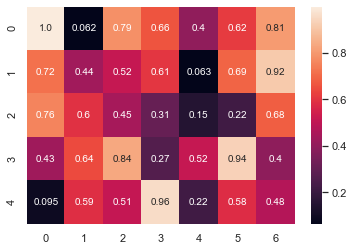

In [214]:
#Plotting the value in the heat map
df_df2 = np.random.rand(5, 7)
heatplot = sns.heatmap(df_df2, annot = True, fmt = ".2")

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [215]:
#creating copy of the Item dataset so that original dataset stays remains the same
df_new1 = Item.copy()
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [216]:
# dropping all the genere columns which are unwanted for this calculations
df_new1.drop(df_new1.iloc[:, 3:21], inplace = True, axis = 1)
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   Western       1681 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 52.7+ KB


In [217]:
#Merging two datasets df_new1 and Data
movie_rating = pd.merge(df_new1, Data, on="movie id")
movie_rating.head()

,movie id,movie title,release date,Western,user id,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,308,4,887736532
1,1,Toy Story,01-Jan-1995,0,287,5,875334088
2,1,Toy Story,01-Jan-1995,0,148,4,877019411
3,1,Toy Story,01-Jan-1995,0,280,4,891700426
4,1,Toy Story,01-Jan-1995,0,66,3,883601324


In [218]:
#calculating count of rating of all movie
rating_count = movie_rating.groupby('movie title')['rating'].count()
rating_count.head()

movie title
'Til There Was You       9
1-900                    5
101 Dalmatians         109
12 Angry Men           125
187                     41
Name: rating, dtype: int64

In [219]:
#Calculating average rating of all movie
rating_average = movie_rating.groupby('movie title')['rating'].mean()
rating_average.head()

movie title
'Til There Was You     2.333333
1-900                  2.600000
101 Dalmatians         2.908257
12 Angry Men           4.344000
187                    3.024390
Name: rating, dtype: float64

In [220]:
#Calculating number of rating for a movie and adding that in separate column
rating_average_count = pd.DataFrame(data = rating_average)
rating_average_count["rating_numbers"] = pd.DataFrame(rating_count)
rating_average_count.head()

,rating,rating_numbers
movie title,,
'Til There Was You,2.333333,9
1-900,2.600000,5
101 Dalmatians,2.908257,109
12 Angry Men,4.344000,125
187,3.024390,41


In [221]:
#Slicing movies which have more than 100 ratings and showing info of it
slice_movie = rating_average_count[rating_average_count['rating_numbers'] > 100]
slice_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 101 Dalmatians  to Young Guns 
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          334 non-null    float64
 1   rating_numbers  334 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.8+ KB


In [222]:
#Displaying top 25 movies have more than 100 ratings
slice_movie[:25]

,rating,rating_numbers
movie title,,
101 Dalmatians,2.908257,109
12 Angry Men,4.344000,125
2001: A Space Odyssey,3.969112,259
Absolute Power,3.370079,127
"Abyss, The",3.589404,151
Ace Ventura: Pet Detective,3.048544,103
"Adventures of Priscilla, Queen of the Desert, The",3.594595,111
"African Queen, The",4.184211,152
Air Force One,3.631090,431


In [223]:
# Sorting movies according to average rating in descending order
rating_average = rating_average.sort_values(ascending=False)

#### Displaying top 25 movies

In [224]:
rating_average[:25]

movie title
Someone Else's America                              5.000000
Marlene Dietrich: Shadow and Light (                5.000000
Great Day in Harlem, A                              5.000000
Santa with Muscles                                  5.000000
Saint of Fort Washington, The                       5.000000
Aiqing wansui                                       5.000000
Prefontaine                                         5.000000
They Made Me a Criminal                             5.000000
Entertaining Angels: The Dorothy Day Story          5.000000
Star Kid                                            5.000000
Pather Panchali                                     4.625000
Anna                                                4.500000
Some Mother's Son                                   4.500000
Everest                                             4.500000
Maya Lin: A Strong Clear Vision                     4.500000
Close Shave, A                                      4.491071
Schindler's 

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [225]:
# Merging all the datasets provided
datasets = pd.merge(pd.merge(Data, Item), User)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99990
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user id       99991 non-null  int64 
 1   movie id      99991 non-null  int64 
 2   rating        99991 non-null  int64 
 3   timestamp     99991 non-null  int64 
 4   movie title   99991 non-null  object
 5   release date  99991 non-null  object
 6   unknown       99991 non-null  int64 
 7   Action        99991 non-null  int64 
 8   Adventure     99991 non-null  int64 
 9   Animation     99991 non-null  int64 
 10  Childrens     99991 non-null  int64 
 11  Comedy        99991 non-null  int64 
 12  Crime         99991 non-null  int64 
 13  Documentary   99991 non-null  int64 
 14  Drama         99991 non-null  int64 
 15  Fantasy       99991 non-null  int64 
 16  Film-Noir     99991 non-null  int64 
 17  Horror        99991 non-null  int64 
 18  Musical       99991 non-null  int64 
 19  Myst

#### Checking validity of the first statement "Men watch more drama than women"

In [226]:
#After running the syntax we can see the percentages of Men watches more Drama than Women. So the given statement is valid.
gender_count_drama = datasets.groupby("gender")["Drama"].sum()/len(datasets)*100
gender_count_drama

gender
F    11.008991
M    28.889600
Name: Drama, dtype: float64

#### Checking validity of the second statement "Women watch more Sci-Fi than men"

In [227]:
#After running the syntax we can see the percentages of Men watches more Sci-Fi than Women. So the given statement is not valid.
gender_count_scifi = datasets.groupby("gender")["Sci-Fi"].sum()/len(datasets)*100
gender_count_scifi

gender
F     2.629237
M    10.101909
Name: Sci-Fi, dtype: float64

#### Checking validity of the third statement "Men watch more Romance than women"

In [228]:
#After running the syntax we can see the percentages Men watches more Romance than Women. So the given statement is valid.
gender_count_romance = datasets.groupby("gender")["Romance"].sum()/len(datasets)*100
gender_count_romance

gender
F     5.858527
M    13.604224
Name: Romance, dtype: float64

### Thanks & Regards!
#### Sharad Karna